`Understand why "Accuracy" is dangerous and learn the 4 types of answers: True Positives, True Negatives, False Positives, and False Negatives.`

#  **The Story: The Boy Who Cried Wolf **
Imagine you build a "Wolf Alarm" for a village. Most of the time (99% of days), there are NO wolves.

## **Scenario 1: Your alarm is broken and never rings.**

Accuracy: 99%! (Because 99% of days, it was right to stay silent).

## **Result: When the wolf finally comes, everyone gets eaten. The model failed.**

To fix this, we need a grid to check exactly how it was right or wrong. This grid is called the Confusion Matrix.

It breaks answers into 4 boxes:

**True Positive (TP): Wolf comes, Alarm rings. (Good!)**

**True Negative (TN): No Wolf, Silence. (Good!)**

**False Positive (FP): No Wolf, Alarm rings! (False Alarm / Crying Wolf)**

**False Negative (FN): Wolf comes, Silence... (The Dangerous Mistake)**

# `**We will use the Breast Cancer Dataset included in Scikit-Learn. (Predicting: Is the tumor Cancer (1) or Benign (0)?).**`

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [9]:
from sklearn.datasets import load_breast_cancer

In [17]:
# Load the Dataset

data = load_breast_cancer()
X = data.data
y = data.target  # 0 = Malignant (Bad), 1 = Benign (Safe)

In [18]:
# Note: In this specific dataset, sklearn labels "Safe" as 1 and "Bad" as 0. 
# Let's flip it so 1 = Cancer (The thing we want to catch) to make it easier to understand.

y = (y == 0).astype(int)

In [19]:
# 2. Split (The Secret Test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LogisticRegression(max_iter=10000) # max_iter helps it study longer
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [21]:
y_pred = model.predict(X_test)

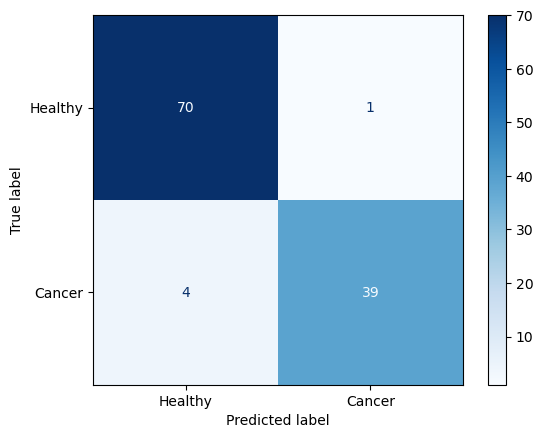

In [22]:
# Create the matrix
cm = confusion_matrix(y_test, y_pred)

# Draw it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Cancer"])
disp.plot(cmap='Blues')